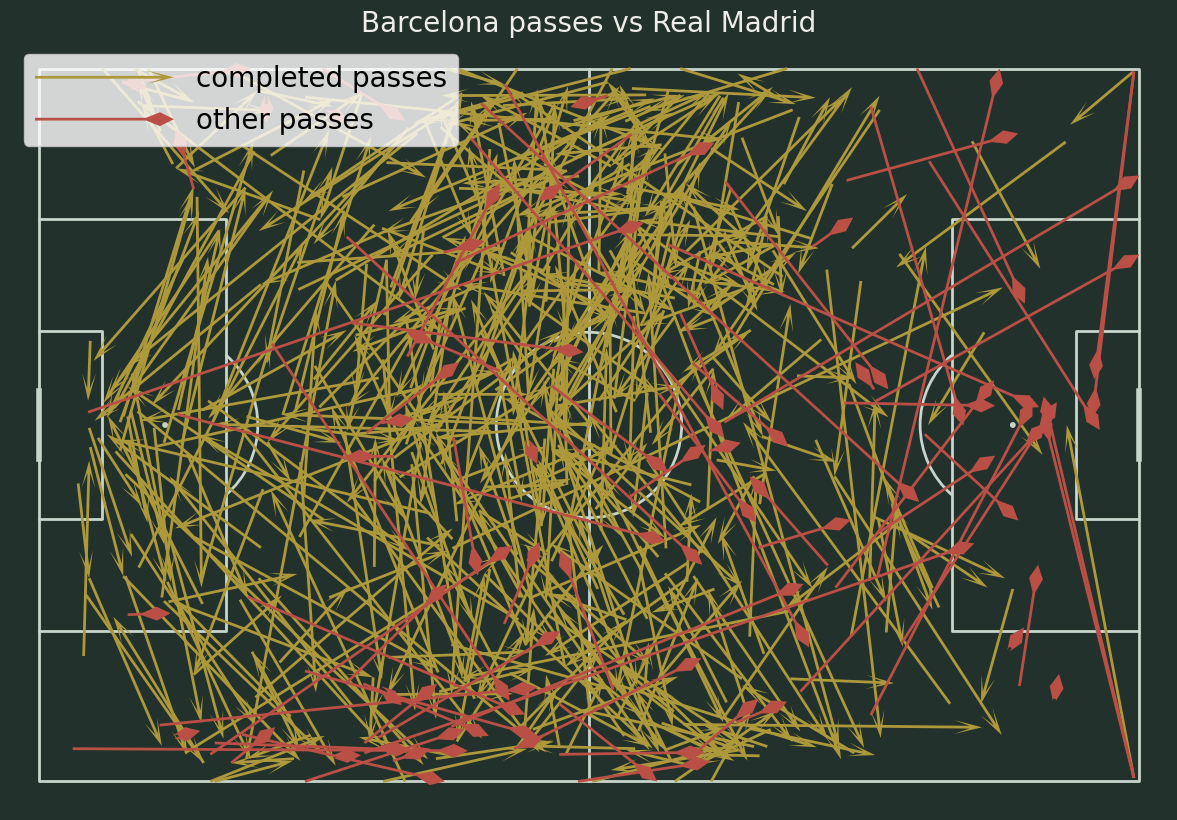

In [74]:
import json
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt


def arrows_pass_plot(success_passes: list, other_passes: list, first_team: str, second_team: str):
    pitch = Pitch(pitch_type='opta',
                  pitch_color='#22312b', line_color='#c7d5cc')
    fig, ax = pitch.draw(
        figsize=(16, 10), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('#22312b')

    def get_team_passes_data(data: list):
        result = []
        x = ()
        y = ()
        end_X = ()
        end_Y = ()
        for pass_data in data:
            x += (pass_data['x'],)
            y += (pass_data['y'],)
            end_X += (pass_data['endX'],)
            end_Y += (pass_data['endY'],)
        result.append(x)
        result.append(y)
        result.append(end_X)
        result.append(end_Y)
        return result

    team_success_passes_data = get_team_passes_data(success_passes)

    team_other_passes_data = get_team_passes_data(other_passes)

    # for pass_data in home_team_other_passes:

    pitch.arrows(team_success_passes_data[0], team_success_passes_data[1],
                 team_success_passes_data[2], team_success_passes_data[3], width=2,
                 headwidth=5, headlength=10, color='#ad993c', ax=ax, label='completed passes')
    pitch.arrows(team_other_passes_data[0], team_other_passes_data[1], team_other_passes_data[2],
                 team_other_passes_data[3], width=2,
                 headwidth=5, headlength=5, headaxislength=10,
                 color='#ba4f45', ax=ax, label='other passes')

    ax.set_label('completed passes')
    ax.legend(facecolor='white', handlelength=5,
              fontsize=20, loc='upper left',)

    ax_title = ax.set_title(f'{first_team} passes vs {second_team}',
                            fontsize=20, color='#edede9')


with open('../../data/whoscored/data.json', 'r') as file:
    data = json.load(file)


home_team_success_passes = list(filter(lambda x: (
    x['type']['displayName'] == 'Pass'
    and x['teamId'] == data['matchCentreData']['home']['teamId']
    and x['outcomeType']['value'] == 1
), data['matchCentreData']['events']))

home_team_other_passes = list(filter(lambda x: (
    x['type']['displayName'] == 'Pass'
    and x['teamId'] == data['matchCentreData']['home']['teamId']
    and x['outcomeType']['value'] != 1
), data['matchCentreData']['events']))

arrows_pass_plot(success_passes=home_team_success_passes,
                 other_passes=home_team_other_passes, first_team='Barcelona', second_team='Real Madrid')

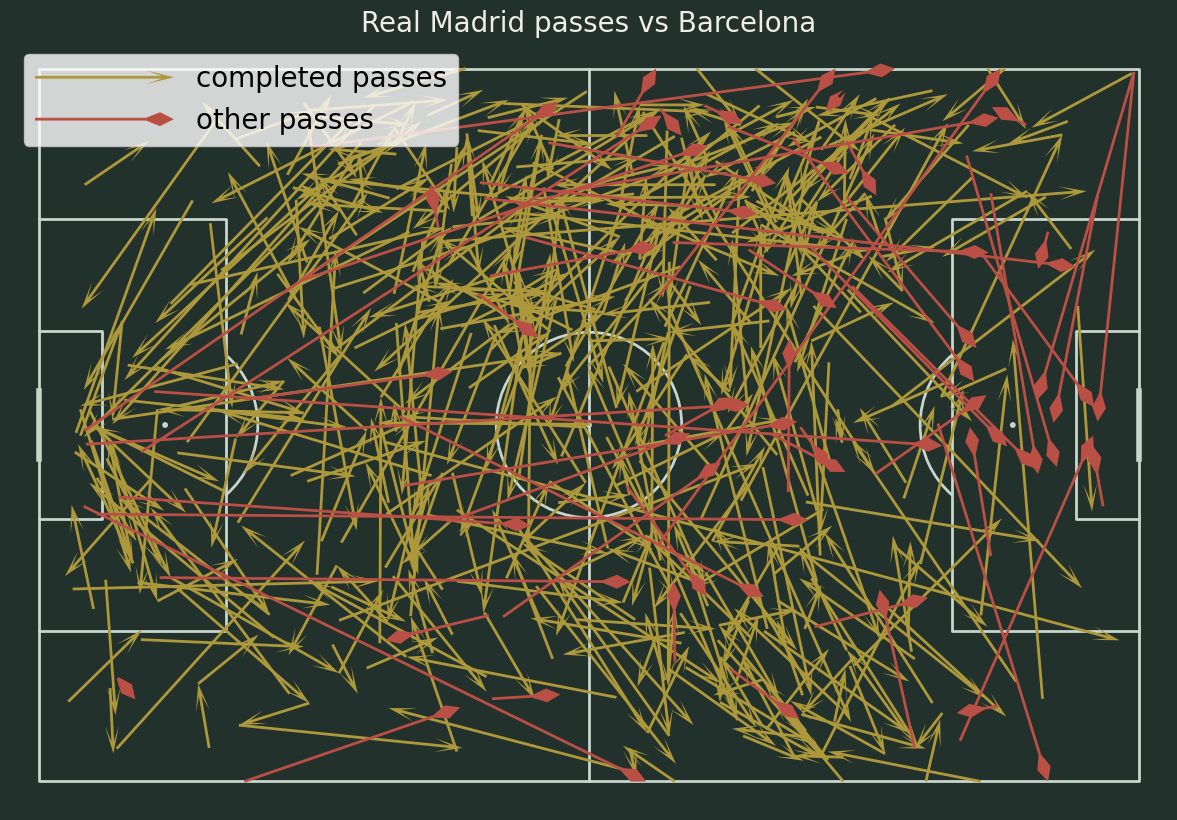

In [75]:
away_team_success_passes = list(filter(lambda x: (
    x['type']['displayName'] == 'Pass'
    and x['teamId'] == data['matchCentreData']['away']['teamId']
    and x['outcomeType']['value'] == 1
), data['matchCentreData']['events']))

away_team_other_passes = list(filter(lambda x: (
    x['type']['displayName'] == 'Pass'
    and x['teamId'] == data['matchCentreData']['away']['teamId']
    and x['outcomeType']['value'] != 1
), data['matchCentreData']['events']))

arrows_pass_plot(success_passes=away_team_success_passes,
                 other_passes=away_team_other_passes, first_team='Real Madrid', second_team='Barcelona')

In [76]:
from mplsoccer.pitch import Pitch


def flow_pass_plot_columns(first_team_passes: list, second_team_passes: list, first_team: str, second_team: str):
    pitch = Pitch(pitch_type='statsbomb',  line_zorder=2,
                  line_color='#c7d5cc', pitch_color='#22312b',)

    bins = (6, 4)
    fig, axs = pitch.grid(ncols=2,  endnote_height=0.03, endnote_space=0, axis=False,
                          title_height=0.08, grid_height=0.84)
    fig.set_facecolor('#22312b')

    def get_team_passes_data(data: list):
        result = []
        x = ()
        y = ()
        end_X = ()
        end_Y = ()
        for pass_data in data:
            x += (pass_data['x'],)
            y += (pass_data['y'],)
            end_X += (pass_data['endX'],)
            end_Y += (pass_data['endY'],)
        result.append(x)
        result.append(y)
        result.append(end_X)
        result.append(end_Y)
        return result

    team_passes_data = get_team_passes_data(first_team_passes)
    second_team_passes_data = get_team_passes_data(second_team_passes)
    passes = [team_passes_data, second_team_passes_data]

    for idx, ax in enumerate(axs['pitch'].flat):
        bs_heatmap = pitch.bin_statistic(
            passes[idx][0], passes[idx][1], statistic='count', bins=bins)
        hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Greens')
        fm = pitch.flow(passes[idx][0],  passes[idx][1],  passes[idx][2],  passes[idx][3],
                        color='black', arrow_type='same',
                        arrow_length=5, bins=bins, ax=ax)
        ax_title = ax.set_title(
            f'{second_team if idx else first_team } pass flow map vs {first_team if idx else second_team}', fontsize=24, pad=20, color='#edede9')

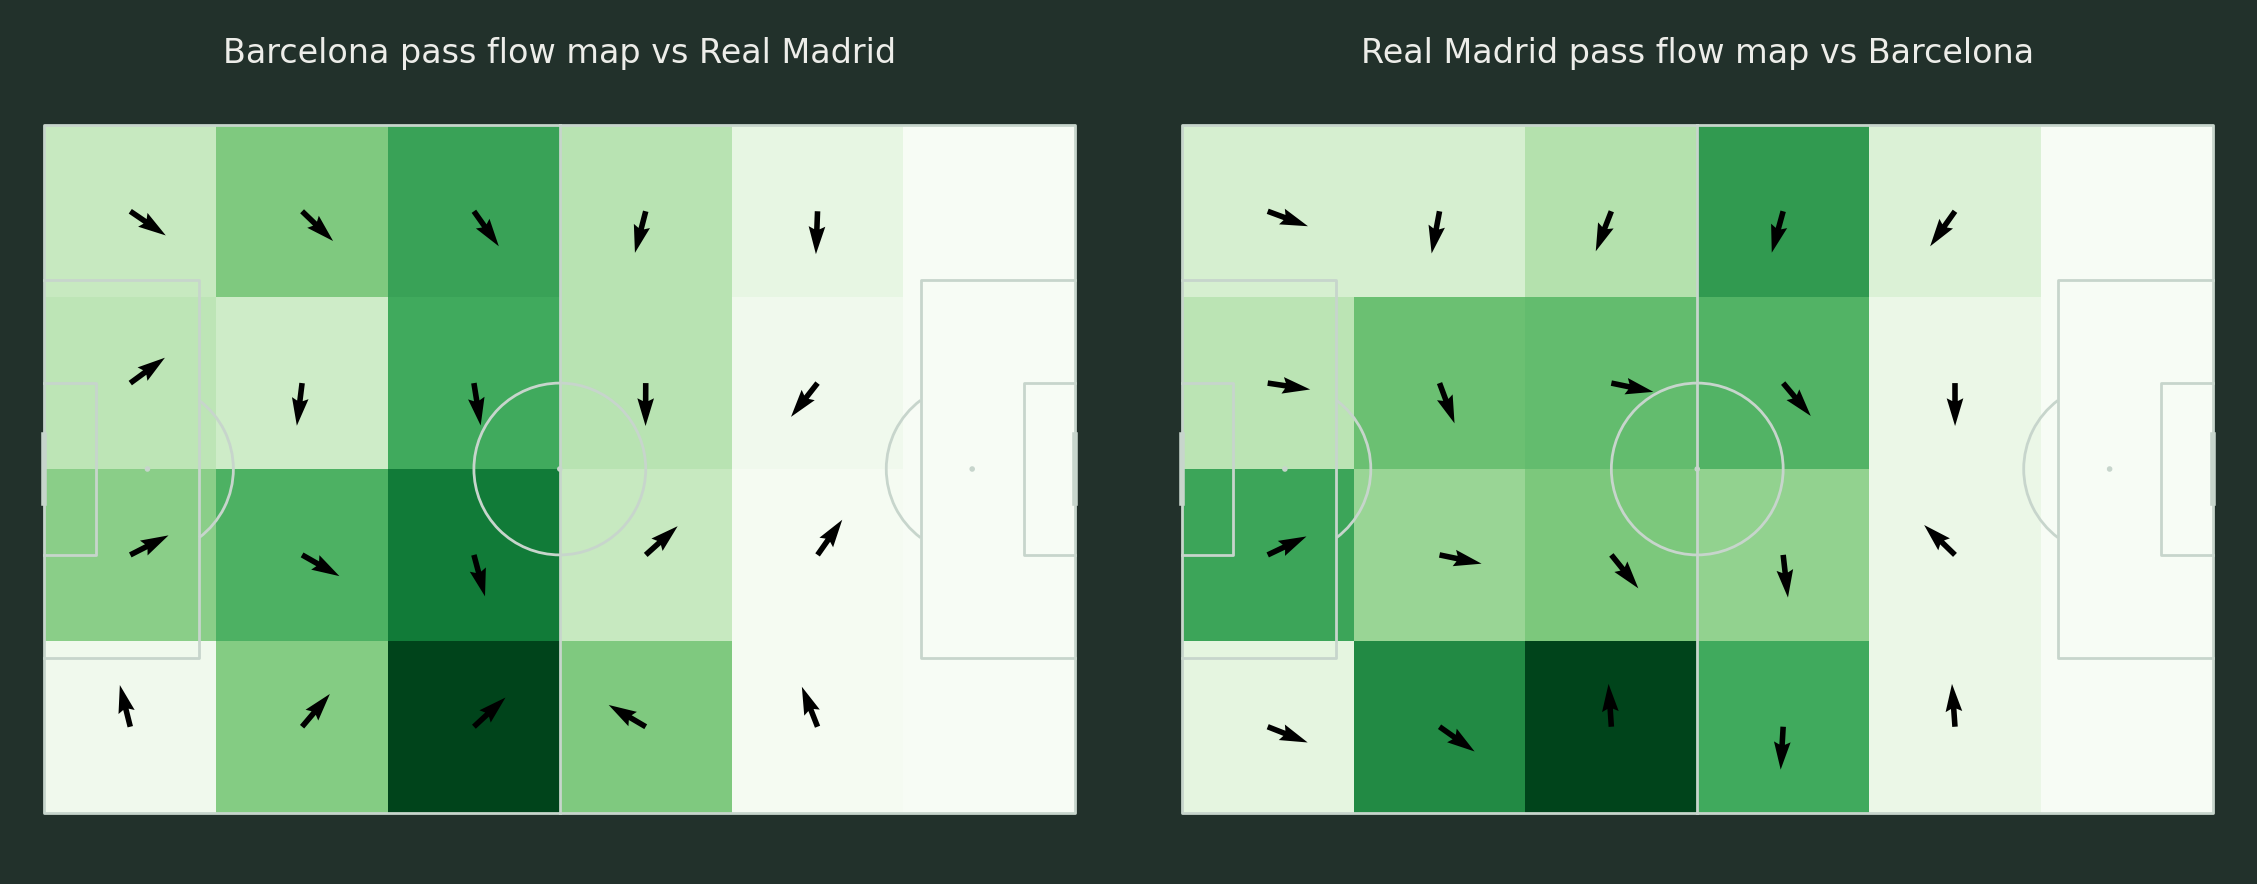

In [77]:
home_team_passes = list(filter(lambda x: (
    x['type']['displayName'] == 'Pass'
    and x['teamId'] == data['matchCentreData']['home']['teamId']
), data['matchCentreData']['events']))
away_team_passes = list(filter(lambda x: (
    x['type']['displayName'] == 'Pass'
    and x['teamId'] == data['matchCentreData']['away']['teamId']
), data['matchCentreData']['events']))


flow_pass_plot_columns(first_team_passes=home_team_passes, second_team_passes=away_team_passes, first_team="Barcelona",
                       second_team='Real Madrid')

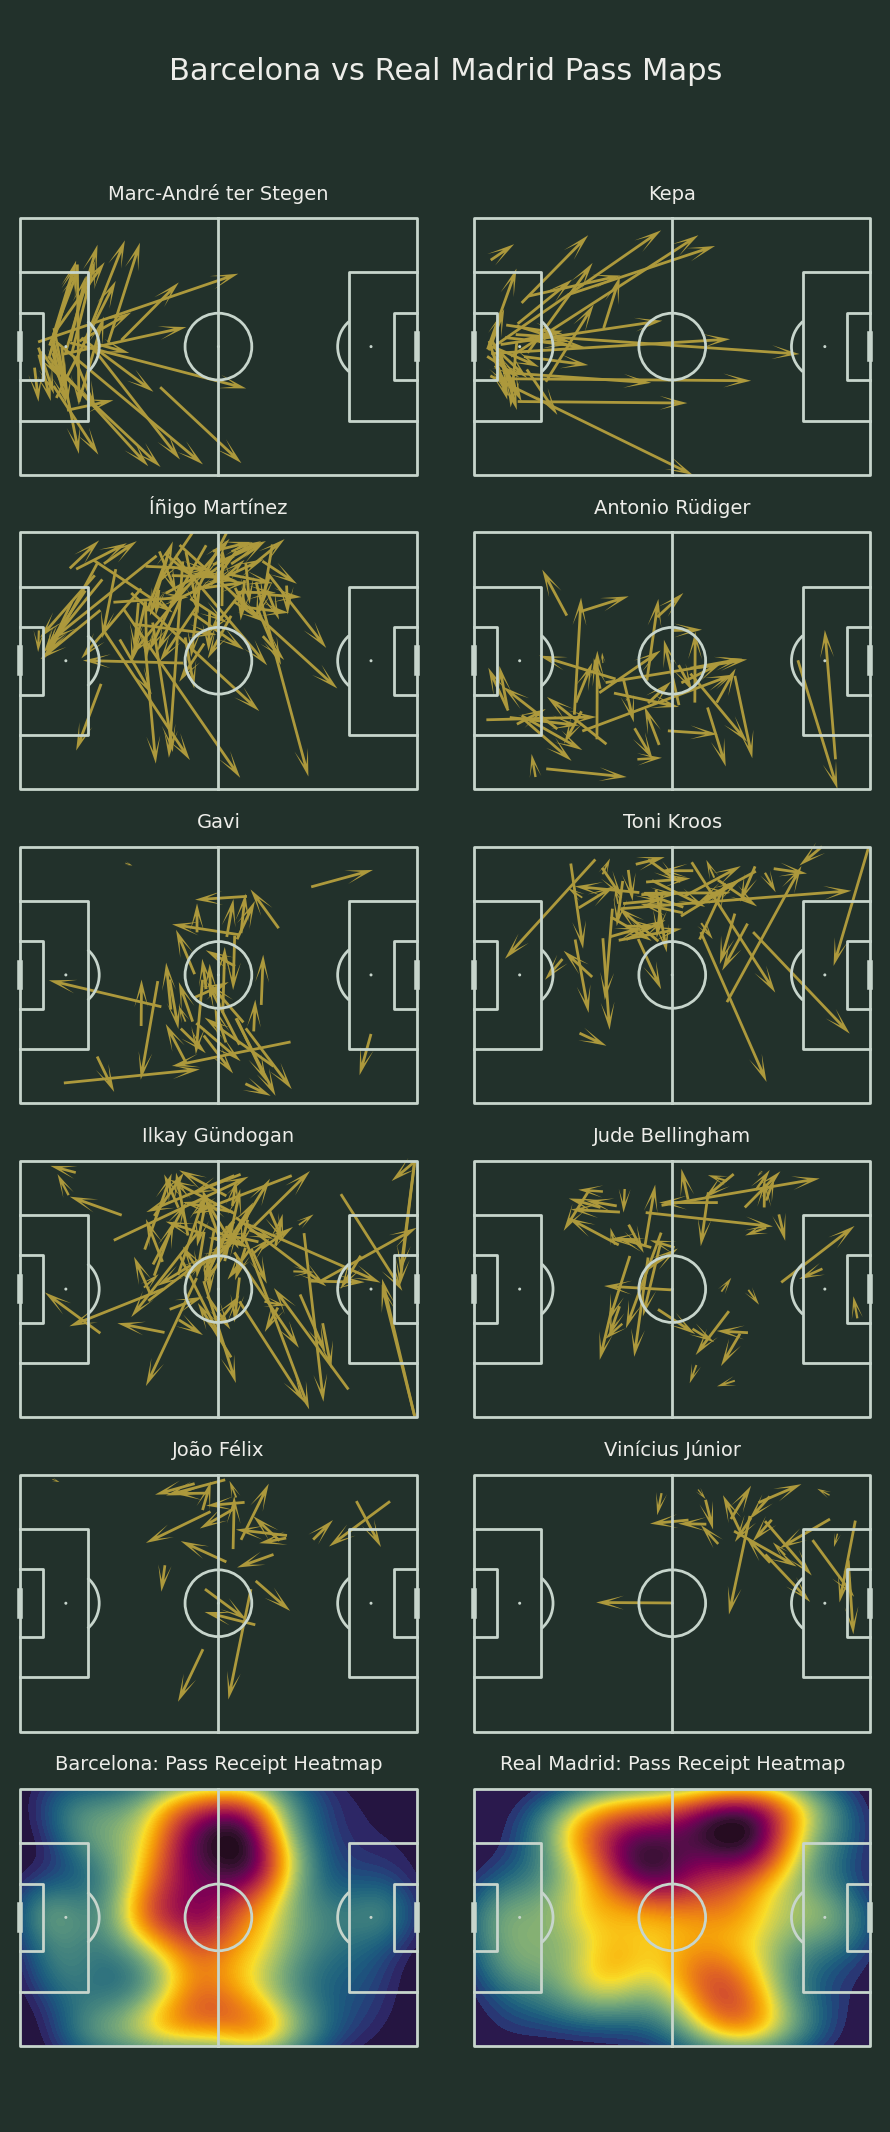

In [78]:
import cmasher as cmr
player_id_mapping = data['matchCentreData']['playerIdNameDictionary']


def get_player_passes_data(data: list, id: int):
    result = []
    x = ()
    y = ()
    end_X = ()
    end_Y = ()
    for pass_data in data:
        x += (pass_data['x'],)
        y += (pass_data['y'],)
        end_X += (pass_data['endX'],)
        end_Y += (pass_data['endY'],)
    result.append(x)
    result.append(y)
    result.append(end_X)
    result.append(end_Y)
    result.append(id)
    return result


def get_team_receive_passes_data(data: list, team_name: str):
    result = []
    x = ()
    y = ()
    for pass_data in data:
        x += (pass_data['endX'],)
        y += (pass_data['endY'],)
    result.append(x)
    result.append(y)
    result.append(team_name)
    return result


def get_passes_by_players_id(id: int):
    result = list(filter(lambda x: (
        x['type']['displayName'] == 'Pass'
        and x['playerId'] == id
    ), data['matchCentreData']['events']))
    return get_player_passes_data(result, id)


comparsion_data_by_players = [
    get_passes_by_players_id(80774),
    get_passes_by_players_id(113880),
    get_passes_by_players_id(106885),
    get_passes_by_players_id(104010),
    get_passes_by_players_id(422937),
    get_passes_by_players_id(31772),
    get_passes_by_players_id(77464),
    get_passes_by_players_id(379868),
    get_passes_by_players_id(362431),
    get_passes_by_players_id(337782),
    get_team_receive_passes_data(home_team_passes, 'Barcelona'),
    get_team_receive_passes_data(away_team_passes, 'Real Madrid'),
]


def comparsion_pass_stat(passes: list, team1: str, team2: str):
    pitch = Pitch(pitch_type='opta',  line_zorder=2,
                  line_color='#c7d5cc', pitch_color='#22312b',)

    fig, axs = pitch.grid(ncols=2,  endnote_height=0.03, endnote_space=0, axis=False, figheight=22, bottom=0.025, space=0.1,
                          title_height=0.08, grid_height=0.84, nrows=6)
    fig.set_facecolor('#22312b')
    num_of_players = 10

    for idx, ax in enumerate(axs['pitch'].flat):
        if idx < num_of_players:
            pitch.arrows(passes[idx][0], passes[idx][1],
                         passes[idx][2], passes[idx][3], width=2,
                         headwidth=5, headlength=10, color='#ad993c', ax=ax, label='completed passes')
            ax.set_title(
                player_id_mapping[f'{passes[idx][4]}'], fontsize=14, color='#edede9')
        else:
            pitch.kdeplot(passes[idx][0], passes[idx][1], ax=ax,
                          cmap=cmr.pride,
                          levels=100,
                          thresh=0, fill=True)
            ax.set_title(f'{passes[idx][2]}: Pass Receipt Heatmap', color='#edede9',
                         fontsize=14)

    axs['title'].text(0.5, 0.65, f'{team1} vs {team2} Pass Maps', fontsize=22,
                      va='center', ha='center', color='#edede9')


comparsion_pass_stat(comparsion_data_by_players, 'Barcelona', 'Real Madrid')